In [51]:
#!pip3 install s3fs --user

     |████████████████████████████████| 65 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 25.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.1 MB 30.7 MB/s eta 0:00:01     |████████████████████▏           | 5.7 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 161 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 47.0 MB/s eta 0:00:01
     |████████████████████████████████| 262 kB 46.9 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-10-13 16:09:08,304 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-10-13 16:09:13,858 WARN yarn.Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [4]:
data = spark.read.csv("hdfs:///user/ubuntu/data_year_month/2009/01/01.csv", )

In [5]:
data.show(5)

+--------------------+----+--------------------+----------+---------+----------+---------+---+
|                 _c0| _c1|                 _c2|       _c3|      _c4|       _c5|      _c6|_c7|
+--------------------+----+--------------------+----------+---------+----------+---------+---+
|2009-01-09 16:10:...|31.9|2009-01-09 16:10:...|-73.873027|40.773883|-73.984545|40.769545|  3|
|2009-01-09 15:01:...| 5.7|2009-01-09 15:01:...|-73.992826|40.751271|-73.982786|40.742432|  1|
|2009-01-25 18:41:...| 6.1|2009-01-25 18:41:...|-74.000122| 40.74308| -74.00615|40.734233|  5|
|2009-01-16 21:10:...| 4.5|2009-01-16 21:10:...|-73.994143|40.751193|-73.988897|40.759742|  1|
|2009-01-24 09:51:...| 5.3|2009-01-24 09:51:...| -73.96707|40.769178|-73.954895| 40.77821|  1|
+--------------------+----+--------------------+----------+---------+----------+---------+---+
only showing top 5 rows



In [6]:
type(data)

pyspark.sql.dataframe.DataFrame

In [7]:
# data가 너무 크니 1000개로 자르기
little_data = data.limit(10000)

In [8]:
# pyspark.sql.dataframe.DataFrame to Pandas df
df = little_data.toPandas()
df.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7
0,2009-01-09 16:10:00.000000170,31.9,2009-01-09 16:10:00 UTC,-73.873027,40.773883,-73.984545,40.769545,3
1,2009-01-09 15:01:20.0000002,5.7,2009-01-09 15:01:20 UTC,-73.992826,40.751271,-73.982786,40.742432,1
2,2009-01-25 18:41:00.000000193,6.1,2009-01-25 18:41:00 UTC,-74.000122,40.74308,-74.00615,40.734233,5
3,2009-01-16 21:10:00.00000056,4.5,2009-01-16 21:10:00 UTC,-73.994143,40.751193,-73.988897,40.759742,1
4,2009-01-24 09:51:00.000000115,5.3,2009-01-24 09:51:00 UTC,-73.96707,40.769178,-73.954895,40.77821,1


In [9]:
column_list =  ["key","fare_amount","pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

In [10]:
df.columns = column_list

In [11]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-01-09 16:10:00.000000170,31.9,2009-01-09 16:10:00 UTC,-73.873027,40.773883,-73.984545,40.769545,3
1,2009-01-09 15:01:20.0000002,5.7,2009-01-09 15:01:20 UTC,-73.992826,40.751271,-73.982786,40.742432,1
2,2009-01-25 18:41:00.000000193,6.1,2009-01-25 18:41:00 UTC,-74.000122,40.74308,-74.00615,40.734233,5
3,2009-01-16 21:10:00.00000056,4.5,2009-01-16 21:10:00 UTC,-73.994143,40.751193,-73.988897,40.759742,1
4,2009-01-24 09:51:00.000000115,5.3,2009-01-24 09:51:00 UTC,-73.96707,40.769178,-73.954895,40.77821,1
...,...,...,...,...,...,...,...,...
9995,2009-01-17 20:55:10.0000001,7,2009-01-17 20:55:10 UTC,-73.97774,40.742199,-73.985564,40.727682,1
9996,2009-01-31 20:51:02.0000001,7.4,2009-01-31 20:51:02 UTC,-74.004458,40.730884,-73.989787,40.726328,3
9997,2009-01-02 15:30:17.0000002,7.3,2009-01-02 15:30:17 UTC,-73.952631,40.7691,-73.952631,40.7691,2
9998,2009-01-10 20:03:00.00000070,5.7,2009-01-10 20:03:00 UTC,-73.990442,40.740327,-73.98598,40.72956,2


In [12]:
df.describe()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,373,8909,8975,9114,8988,9186,6
top,2009-01-09 16:10:00.000000170,5.3,2009-01-15 12:47:00 UTC,0,0,0,0,1
freq,1,483,6,151,151,147,147,6737


In [13]:
#check 결측치
df.isnull().sum().sort_values(ascending=False)
print(df.shape)

(10000, 8)


In [14]:
#drop 결측치
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

/tmp/ipykernel_296971/2820316284.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df.drop(df[df.isnull().any(1)].index, axis = 0)


In [15]:
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [16]:
df = df.astype({'fare_amount':'float',
              'pickup_longitude':'float',
              'pickup_latitude':'float',
              'dropoff_longitude':'float',
              'dropoff_latitude':'float',
              'passenger_count':'int'},)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                10000 non-null  datetime64[ns]     
 1   fare_amount        10000 non-null  float64            
 2   pickup_datetime    10000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   10000 non-null  float64            
 4   pickup_latitude    10000 non-null  float64            
 5   dropoff_longitude  10000 non-null  float64            
 6   dropoff_latitude   10000 non-null  float64            
 7   passenger_count    10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1)
memory usage: 625.1 KB


In [18]:
# #fare_amount값이 0인 경우를 찾기 :2가지
# from collections import Counter
# Counter(df['fare_amount']<0)

In [19]:
#drop fare_amount가 0인경우 (요금이 0이 나온경우는 제거)
df = df.drop(df[df['fare_amount']<0].index, axis=0)
df.shape

(10000, 8)

Text(0, 0.5, 'Frequency')

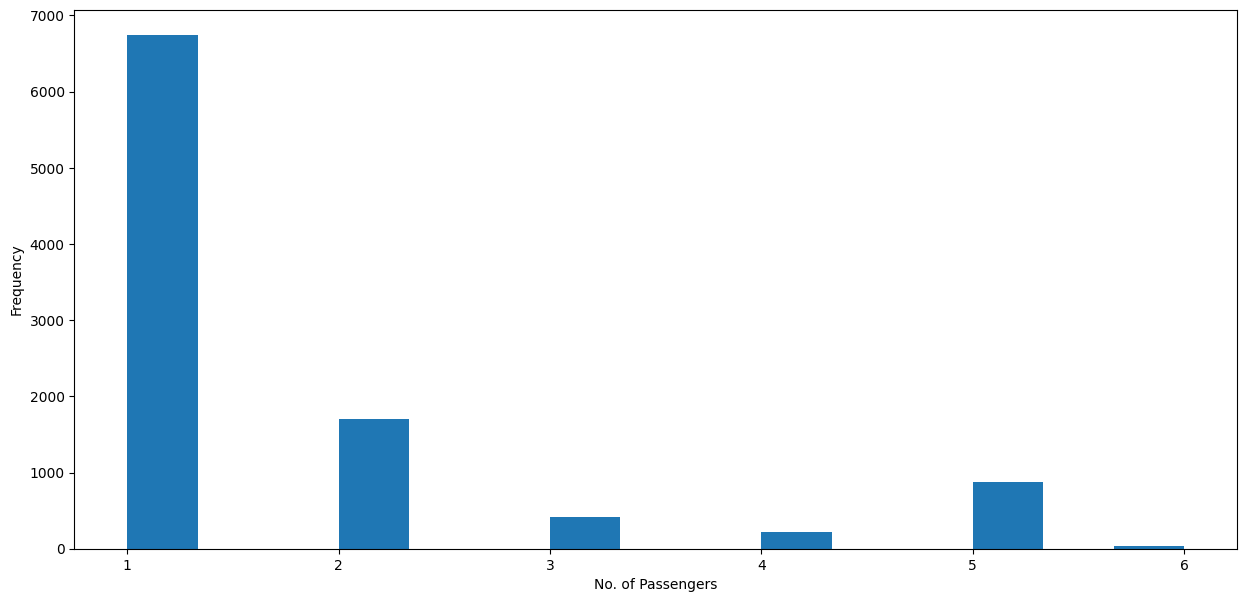

In [20]:
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

In [21]:
df.to_csv('s3://team07-data/SPARK-ETL/pyspark_ETL.csv', index=False) #aws의 s3 저장소로 업로드